In [1]:
import apogee.tools.read as apread
import apogee.spec.plot as splot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline
Lambda = splot.apStarWavegrid()
import csv
import sys

In [2]:
def find_nearest(array,value):
    index = (np.abs(array-value)).argmin()
    #return array[index]
    return index

## Main Function

In [3]:
def Equiv_Width(loc_id,twomass_id):
    
    #given a certain spec
    spec_header = apread.apStar(loc_id,twomass_id,ext=0,header=True)
    spec_noheader = apread.apStar(loc_id,twomass_id,ext=1,header=False)
    nvisits = spec_header[1]['NVISITS']
    EqW_array = []
    
    #calculate the emission line in a vacuum
    vhelio = spec_header[1]['VHELIO']

    c = 299792
    rydberg = 1.0973731568539*(10**7)
    electron = 9.10938356*(10**-31)
    nucleus = 1.672621898*(10**-27)
    fracryd = rydberg/(1+(electron/nucleus))
    vacuum = fracryd*((1./16.)-(1./121.))
    lambda_obs = 1/vacuum
    calculated_point1 = lambda_obs*(1+(-vhelio/c))
    calculated_point2 = calculated_point1*(10**10)
    
    
    
    #EqW calculations
    for i in range(nvisits):
        spec = spec_noheader[2 + i]
    
        centerline = find_nearest(Lambda,calculated_point2)
        L1 = centerline - 90
        L2 = centerline - 45
        R1 = centerline + 45
        R2 = centerline + 90
        #generic continuum lines 35 elements wide 
        lsum= np.sum(spec[L1:L2])/ len(spec[L1:L2])
        rsum = np.sum(spec[R1:R2])/len(spec[R1:R2])
        Fc= (lsum+rsum)/2
    
        EqW=0
        
        for i in range(L2,R1):
            summ=(Fc*(Lambda[i+1]-Lambda[i]))-((1./2.)*(Lambda[i+1]-Lambda[i])*(spec[i+1]+spec[i]))
            EqW = EqW + summ
        EqW = abs(EqW/Fc)
        EqW_array.append(EqW)
        

    STD = np.std(EqW_array)
    EqW_M = np.median(EqW_array)
    
    #Plotting
    
    Lwindow = find_nearest(Lambda,calculated_point2-40)
    Rwindow = find_nearest(Lambda,calculated_point2+40)
    avg_width= Rwindow-Lwindow
    avg = np.zeros(shape=(avg_width,))
    
    for i in range(nvisits):
       
        input_spectra = spec_noheader[2 + i]
        avg += input_spectra[Lwindow:Rwindow]   
    
    #Plotting all visits
    #for i in range(nvisits):
        #plt.plot(Lambda,spec_noheader[i])
        #plt.xlim(Lambda[centerline]-40,Lambda[centerline] + 40)
        #plt.axvline(x=Lambda[centerline],ls='dashed',color='r')
        
    #plt.plot(Lambda[Lwindow:Rwindow],avg/nvisits)
    #plt.xlim(Lambda[centerline]-40,Lambda[centerline] + 40)
    #plt.axvline(x=Lambda[centerline],ls='dashed',color='r')
    #plt.axvspan(Lambda[L1],Lambda[L2],color='green',alpha=0.2)
    #plt.axvspan(Lambda[R1],Lambda[R2],color='green',alpha=0.2)
    #plt.axhline(Fc,ls='dashed',color='black')
    #plt.xlabel('Wavelength (Angstroms)')
    #plt.ylabel('Flux')
    
    #Setting up the ylimit values
    bigy= []
    for i in range(nvisits):
        input_spectra = spec_noheader[2 + i]
        bigy.append(np.max(input_spectra[L2:R1]))
    ymax_allvisits = np.max(bigy) + 100
    ymax_avg = np.max(avg/nvisits)+100
    ymin = Fc - 100
    
    # Three subplots sharing both x/y axes
    
    f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False)
    
    for i in range(nvisits):
        ax1.plot(Lambda,spec_noheader[2+i])
    plt.xlim(Lambda[centerline]-40,Lambda[centerline] + 40)
    ax1.axvspan(Lambda[L1],Lambda[L2],color='green',alpha=0.2)
    ax1.axvspan(Lambda[R1],Lambda[R2],color='green',alpha=0.2)
    ax1.axhline(Fc,ls='dashed',color='black')
    ax2.axhline(Fc,ls='dashed',color='black')
    ax1.axvline(x=Lambda[centerline],ls='dashed',color='r')
    ax2.axvline(x=Lambda[centerline],ls='dashed',color='r') 
    ax2.plot(Lambda[Lwindow:Rwindow],avg/nvisits)
    ax1.set_ylim([ymin, ymax_allvisits])
    ax2.set_ylim([ymin, ymax_avg])
    ax1.set_title('Double Plot')
    plt.xlabel('Wavelength (Angstroms)')
    ax1.set_ylabel('Flux')
    ax2.set_ylabel('Flux')
    
    
    # Fine-tune figure; make subplots close to each other and hide x ticks for
    # all but bottom plot.
    f.subplots_adjust(hspace=0)
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    
    #plt.savefig('foo.png',dpi=300)

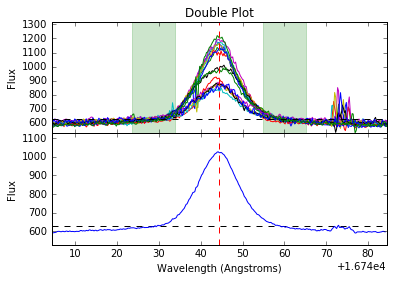

In [4]:
Equiv_Width(4586,'2M03434449+3143092')

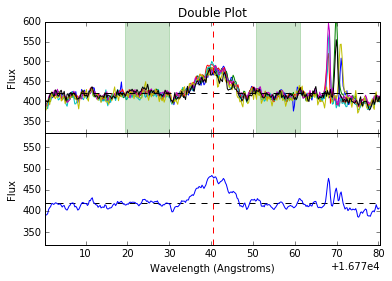

In [5]:
Equiv_Width(4587,'2M03295403+3120529')

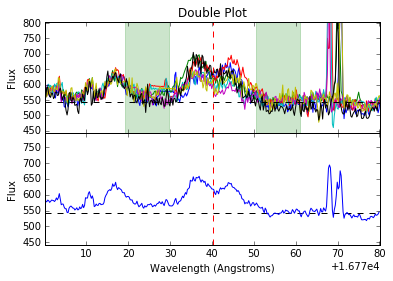

In [6]:
Equiv_Width(4587,'2M03250943+3046215')

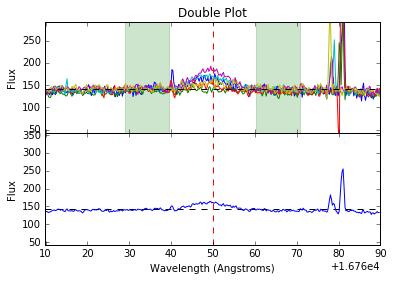

In [7]:
Equiv_Width(4572,'2M06404837+0948385')

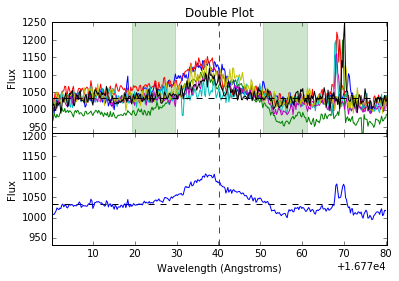

In [8]:
Equiv_Width(4587,'2M03292187+3115363')

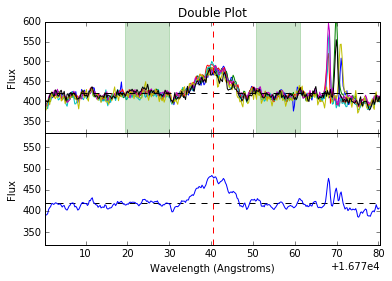

In [9]:
Equiv_Width(4587,'2M03295403+3120529')

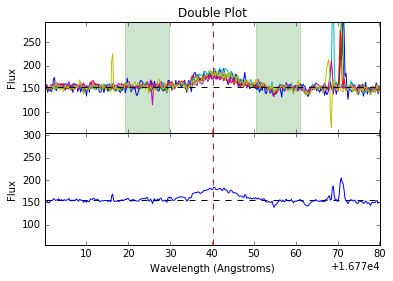

In [10]:
Equiv_Width(4572,'2M06413876+0932117')

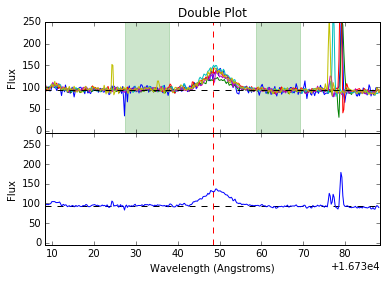

In [11]:
Equiv_Width(4572,'2M06410890+0929451')

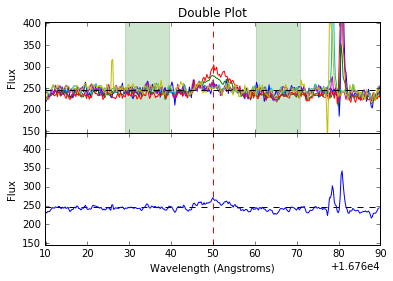

In [12]:
Equiv_Width(4572,'2M06410715+0927294')

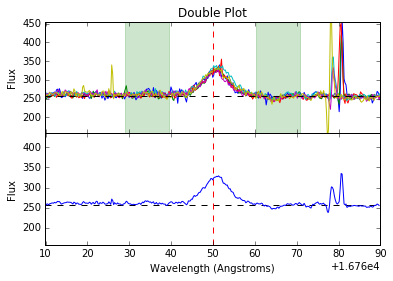

In [13]:
Equiv_Width(4572,'2M06405926+0933250')

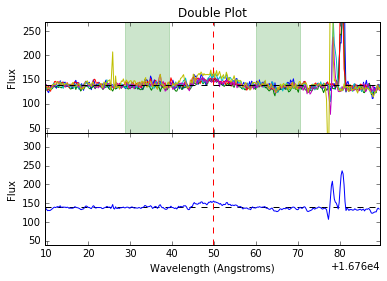

In [14]:
Equiv_Width(4572,'2M06405426+0949203')

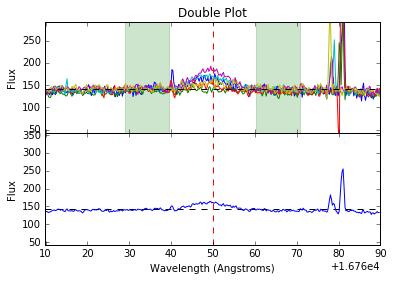

In [15]:
Equiv_Width(4572,'2M06404837+0948385')

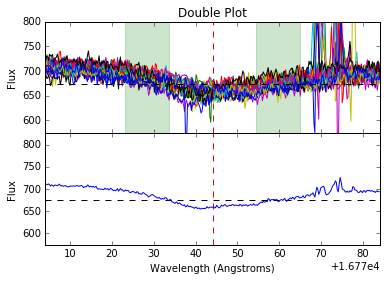

In [16]:
Equiv_Width(4162,'2M08541894+1239291')